# Capstone EDA

# 1. Problem defination and target

+ Problem:

This project involves performing an exploratory data analysis (EDA) on Airbnb listings data for a particular city. 

The analysis will focus on factors such as `price`, `availability`, `location`, and `property type`.

The project will include `data cleaning`, `visualization`, and `statistical analysis` using tools such as Python and Jupyter Notebook. 

Data: http://insideairbnb.com/get-the-data/

+ Target:

Identify `trends and patterns` in the demand for Airbnb listings in the city. 

# 2. Data collection

Import libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Importing

In [41]:
df= pd.read_csv(r"listings_gv.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,336,2023-05-31,1.95,1,7,40,NaN
1,20168,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.10,2,0,0,NaN
2,213371,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,1100324,Hendrik,NaN,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270,4,23,2023-01-08,0.16,1,2,1,0363 F88F 4B47 6E9B 225B
3,155548,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,748161,Maria,NaN,Oud-Oost,52.36420,4.92829,Entire home/apt,200,3,21,2019-08-20,0.15,1,0,0,0363 A562 4D7E 4A91 60DF
4,27886,Houseboat in Amsterdam · ★4.94 · 1 bedroom · 1...,97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,137,3,251,2023-05-01,1.81,1,0,20,NaN


In [42]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
7603,905666980733146256,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,16570501,Willemijn,NaN,De Baarsjes - Oud-West,52.362909,4.866164,Entire home/apt,500,2,0,NaN,NaN,1,17,0,0363 3B54 57D4 8994 D1D2
7604,905731222562001828,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,132654754,Atal,NaN,Osdorp,52.354460,4.791710,Entire home/apt,190,2,0,NaN,NaN,1,34,0,0363 8CA7 6BF7 EABB 76E1
7605,906161615984076237,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,23932215,Sabine,NaN,De Baarsjes - Oud-West,52.363597,4.858541,Entire home/apt,359,2,0,NaN,NaN,1,18,0,0363 DE11 2D1E E27B 04D1
7606,906312347067677212,Home in Amsterdam · ★New · 2 bedrooms · 2 beds...,4437313,Melianthe,NaN,Zuid,52.349906,4.860463,Entire home/apt,223,1,0,NaN,NaN,1,73,0,0363 5A64 9849 958A 8FBE
7607,906313802809767607,Condo in Amsterdam · ★New · 1 bedroom · 1 bed ...,70167802,Luc,NaN,De Baarsjes - Oud-West,52.372179,4.847902,Entire home/apt,139,2,0,NaN,NaN,1,100,0,0363 1339 3B4E 5B8D 5707


# 3. Data preprocessing

info about data

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7608 non-null   int64  
 1   name                            7608 non-null   object 
 2   host_id                         7608 non-null   int64  
 3   host_name                       7608 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7608 non-null   object 
 6   latitude                        7608 non-null   float64
 7   longitude                       7608 non-null   float64
 8   room_type                       7608 non-null   object 
 9   price                           7608 non-null   int64  
 10  minimum_nights                  7608 non-null   int64  
 11  number_of_reviews               7608 non-null   int64  
 12  last_review                     68

describe `numerical` values

In [44]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,7.608000e+03,7.608000e+03,0.0,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,6898.000000,7608.000000,7608.000000,7608.000000
mean,2.328487e+17,1.032177e+08,NaN,52.366725,4.889936,251.065589,4.914564,47.499211,1.170351,1.798896,79.586619,11.798896
std,3.489604e+17,1.393419e+08,NaN,0.017068,0.035059,263.170218,33.263777,106.402516,2.353310,2.590756,106.483001,33.469905
min,2.818000e+03,3.159000e+03,NaN,52.290340,4.755710,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.696009e+07,9.937172e+06,NaN,52.355890,4.866060,148.000000,2.000000,3.000000,0.270000,1.000000,0.000000,0.000000
50%,3.822749e+07,3.501297e+07,NaN,52.365980,4.887770,202.000000,3.000000,11.000000,0.560000,1.000000,21.000000,3.000000
75%,6.525168e+17,1.402245e+08,NaN,52.376470,4.908300,300.000000,4.000000,40.000000,1.260000,1.000000,145.000000,9.000000
max,9.071470e+17,5.183111e+08,NaN,52.425120,5.026430,12000.000000,1001.000000,2720.000000,114.930000,22.000000,365.000000,1626.000000


describe `categorical` values

In [45]:
df.describe(include='object')

,name,host_name,neighbourhood,room_type,last_review,license
count,7608,7608,7608,7608,6898,6474
unique,3585,3031,22,4,977,5737
top,Rental unit in Amsterdam · ★5.0 · 1 bedroom · ...,Maarten,De Baarsjes - Oud-West,Entire home/apt,2023-05-21,Exempt
freq,224,39,1260,5783,345,571


missing data

In [46]:
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               7608
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        710
reviews_per_month                  710
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1134
dtype: int64

we have missing values in 4 columns:

column `neighbourhood_group` is `empty` so drop it or `median` function

In [47]:
df.drop('neighbourhood_group', axis=1, inplace=True)

column `last_review` is `object` so apply `mode` function

In [48]:
df['last_review'].fillna(df['last_review'].mode()[0], inplace=True)

to choose between `mean or median` we should check about `outliers` using `boxplot` from seaborn

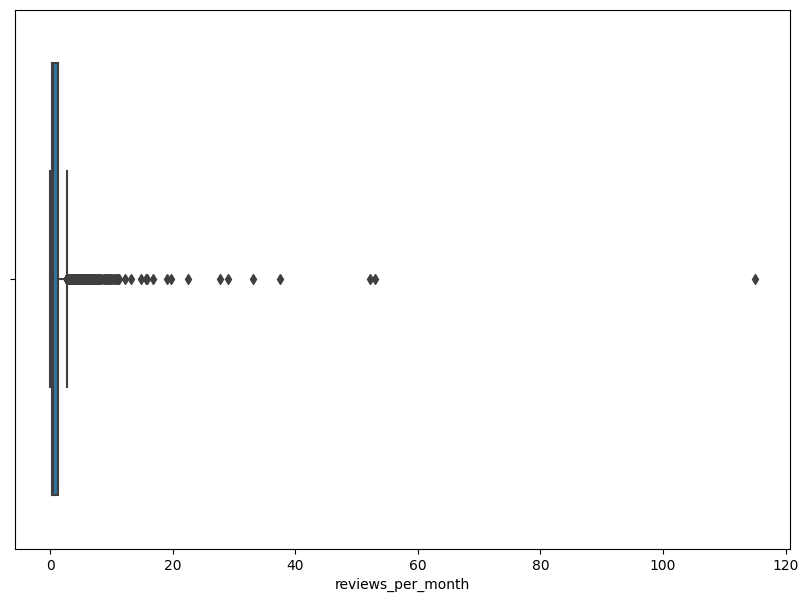

In [49]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='reviews_per_month', data=df)
plt.show()

ops! we have missing values so we can't use `mean`

In [50]:
df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace=True)

column `license` is `object` so apply `mode` function

In [51]:
df['license'].fillna(df['license'].mode()[0], inplace=True)

In [52]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
dtype: int64

duplicated data

In [53]:
df.duplicated().sum()

0

Convert data type for `last_review` from `str to datatime` to extract some information

In [54]:
df['last_review'] = pd.to_datetime(df['last_review'])
df['day'] = df['last_review'].dt.day
df['month'] = df['last_review'].dt.month
df['year'] = df['last_review'].dt.year

In [55]:
df.head(1)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,day,month,year
0,2818,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,336,2023-05-31,1.95,1,7,40,Exempt,31,5,2023


Remove irrelevant columns

In [56]:
df.drop(['name', 'host_id'], axis=1, inplace=True)

In [57]:
df.head(1)

,id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,day,month,year
0,2818,Daniel,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,336,2023-05-31,1.95,1,7,40,Exempt,31,5,2023


# 4. EDA

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              7608 non-null   int64         
 1   host_name                       7608 non-null   object        
 2   neighbourhood                   7608 non-null   object        
 3   latitude                        7608 non-null   float64       
 4   longitude                       7608 non-null   float64       
 5   room_type                       7608 non-null   object        
 6   price                           7608 non-null   int64         
 7   minimum_nights                  7608 non-null   int64         
 8   number_of_reviews               7608 non-null   int64         
 9   last_review                     7608 non-null   datetime64[ns]
 10  reviews_per_month               7608 non-null   float64       
 11  calc

In [59]:
df.columns

Index(['id', 'host_name', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'day', 'month',
       'year'],
      dtype='object')

we see the `most 5 hosts` with `most reviews`

In [60]:
df.groupby(['host_name']).size().sort_values(ascending=False).to_frame(name = "number_of_reviews").head(5)

,number_of_reviews
host_name,
Maarten,39
Thomas,38
David,35
Marcel,35
Jeroen,34


Visualize the distribution of different `room types` using a `bar plot` to understand the `most and least common room types`.

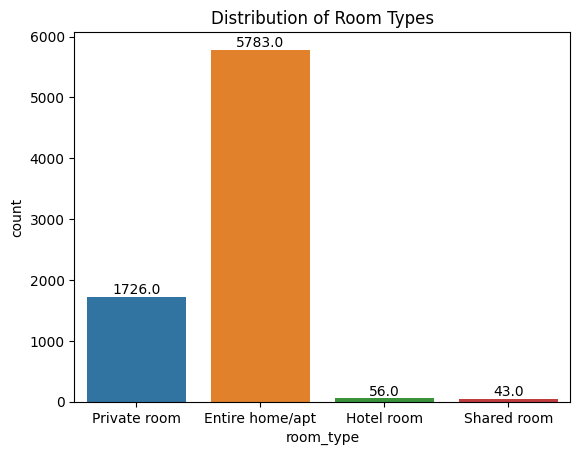

In [61]:
ax= sns.countplot(x='room_type', data=df)
plt.title("Distribution of Room Types")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2. , p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

- we see that `Entire home/apt` is the `most` important type of rooms.
- also that `shared room` is the `least` important type of rooms.

use `violin plots` to see the `price` distribution across different `room types`

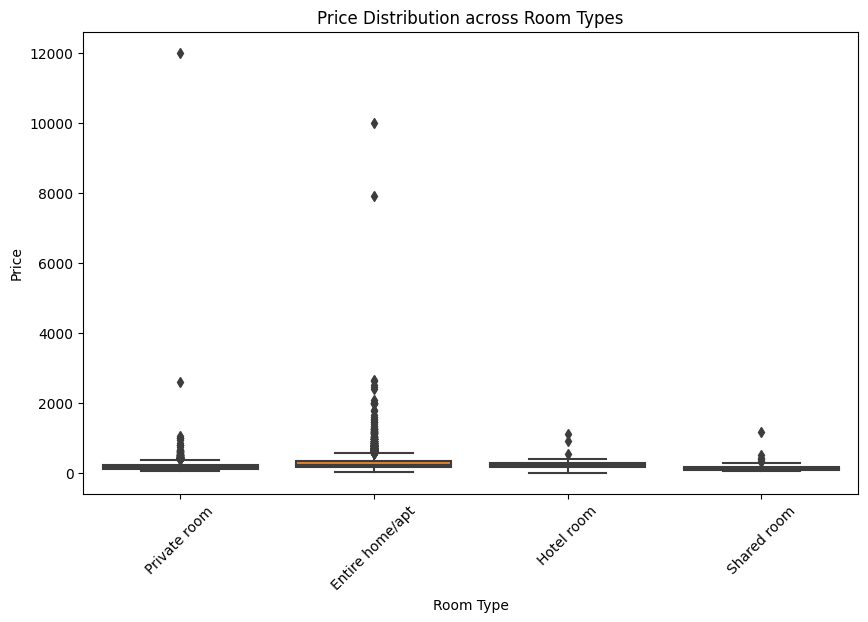

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title("Price Distribution across Room Types")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

+ we have `outliers` in column `price` we should handle them:
    - if `outliers` are `much` we make them `equal max or min`.
    - if `outliers` are `small` we `remove` them.

In [63]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
iqr_threshold = 1.5
lower_bound = q1 - iqr_threshold * iqr
upper_bound = q3 + iqr_threshold * iqr

num_outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
len(num_outliers)

353

In [64]:
df['price'].count()

7608

then `outliers` are small so we `remove` them.

In [65]:
df = df[~df.index.isin(num_outliers.index)]
df['price'].count()

7255

`histogram` to visualize the distribution of `prices`

Text(0.5, 1.0, 'Price Distribution')

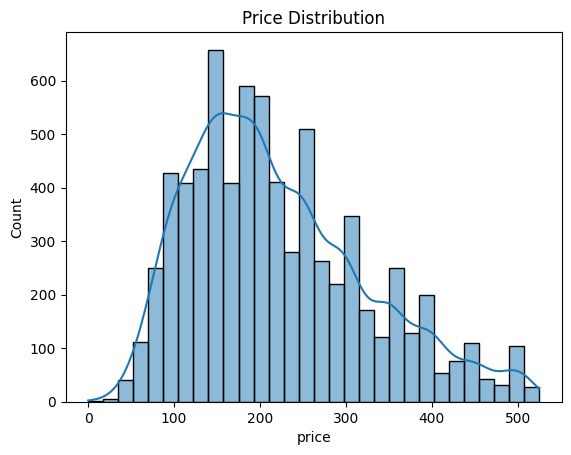

In [66]:
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Price Distribution")

now, we remove `outliers`

Visualize the correlations using a `heatmap` between `numeric features` and `price` to identify which features are `most correlated with the price`

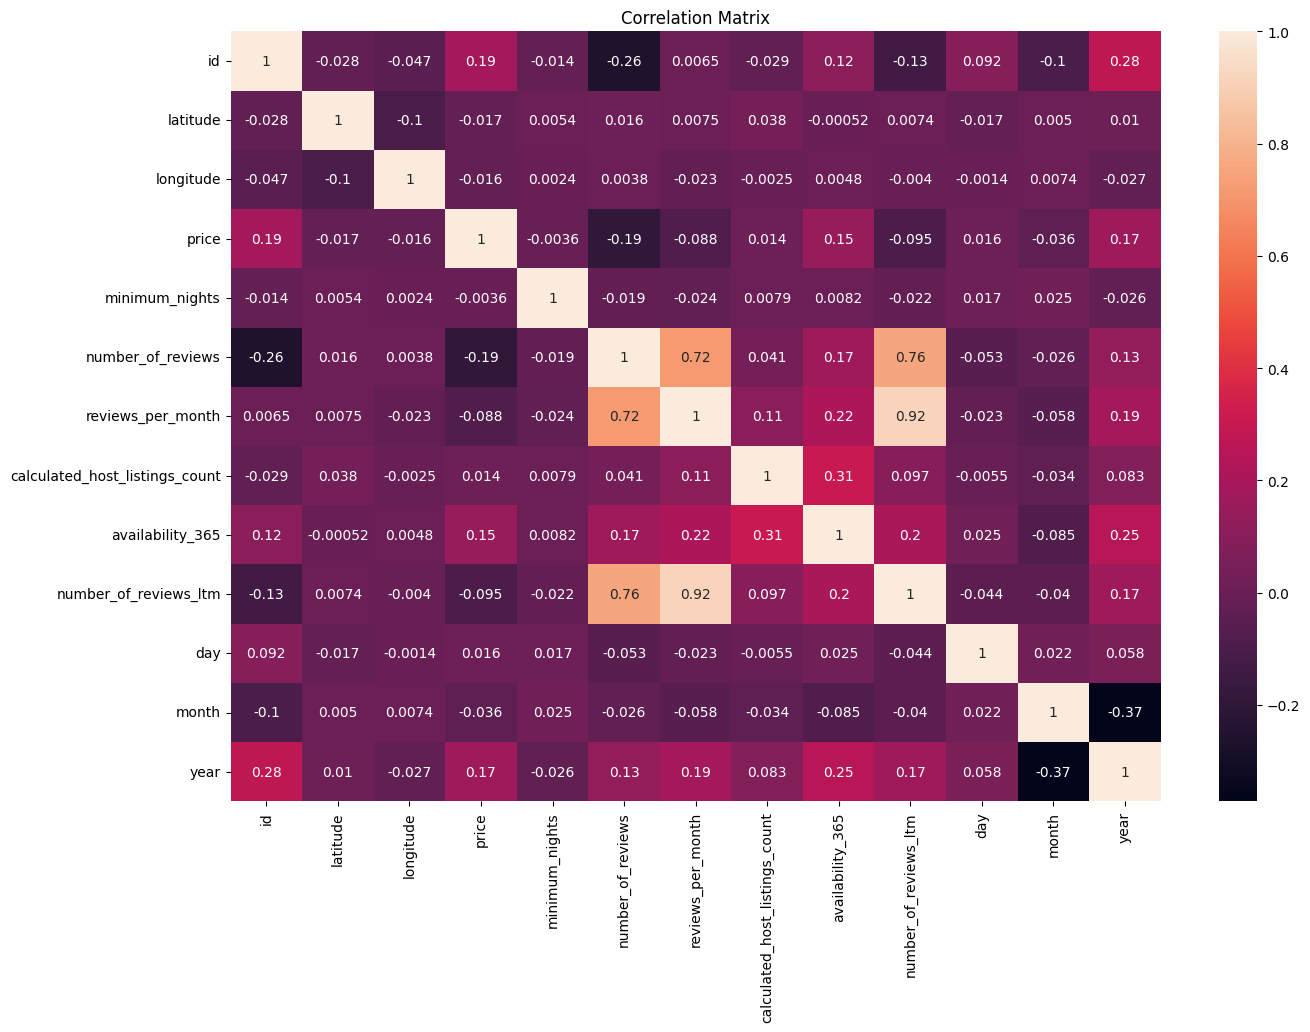

In [67]:
plt.figure(figsize=(15,10))
sns.heatmap(df[df.select_dtypes(include=['number']).columns].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

- correlation coefficient between `price` and `number_of_reviews` is `-0.19`, that is `weak negative correlation`,  that as the `number_of_reviews increases`, the `price tends to decrease`.
- correlation coefficient between `price` and `reviews_per_month` is `-0.088`, that is `weak negative correlation`,  that as the `reviews_per_month increases`, the `price tends to decrease`.
- correlation coefficient between `price` and `number_of_reviews_ltm` is `-0.095`, that is `weak negative correlation`,  that as the `number_of_reviews_ltm increases`, the `price tends to decrease`.
- correlation coefficient between `price` and `availability_365` is `0.15`, that is `strong positive correlation`,  that as the `availability_365 increases`, the `price tends to inncreases`.

<Axes: xlabel='availability_365', ylabel='price'>

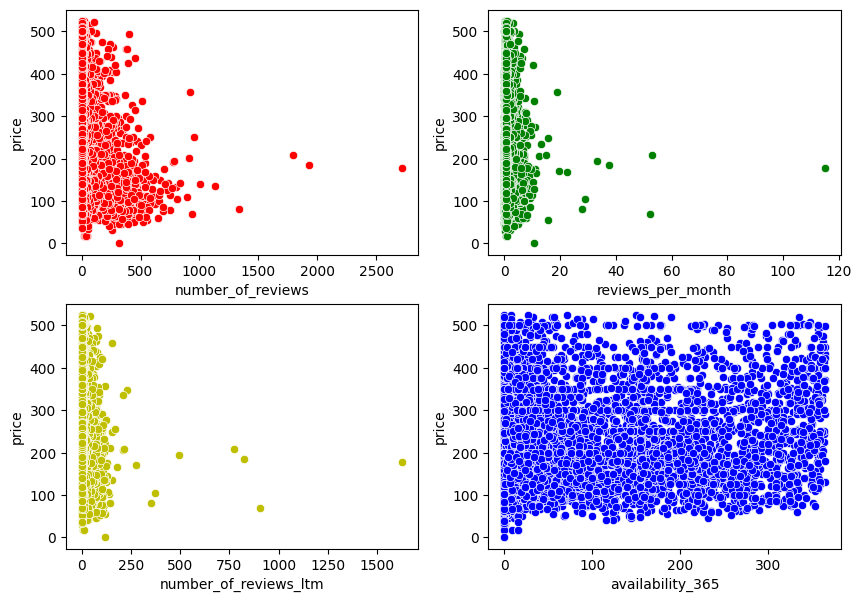

In [68]:
fig, ax= plt.subplots(nrows=2, ncols=2, figsize=(10,7))
sns.scatterplot(x='number_of_reviews', y='price', data=df, ax=ax[0][0], color='r')
sns.scatterplot(x='reviews_per_month', y='price', data=df, ax=ax[0][1], color='g')
sns.scatterplot(x='number_of_reviews_ltm', y='price', data=df, ax=ax[1][0], color='y')
sns.scatterplot(x='availability_365', y='price', data=df, ax=ax[1][1], color='b')

- Correlation coefficient between `latitude and price= -0.017`
- Correlation coefficient between `longitude and price= -0.016`

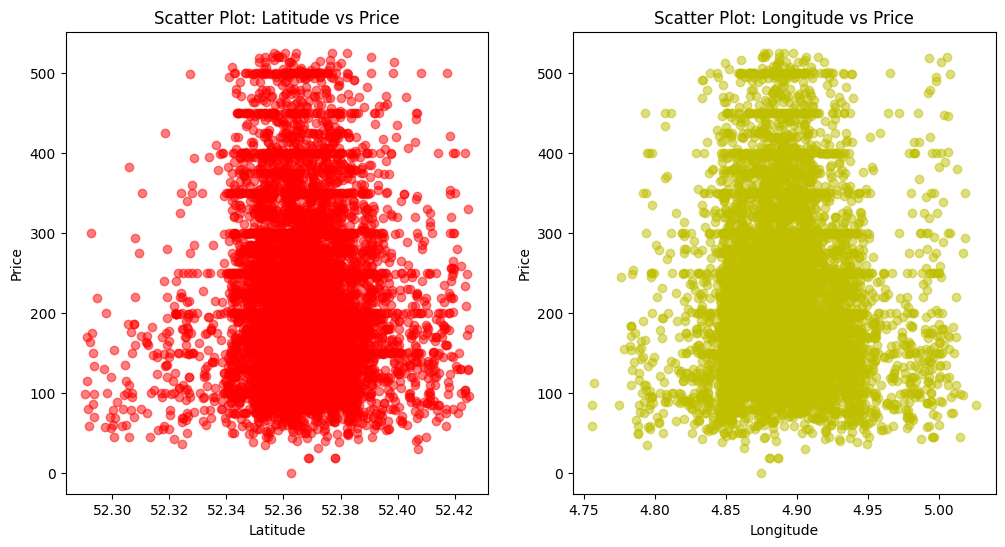

In [69]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['latitude'], df['price'], alpha=0.5, color='r')
plt.xlabel('Latitude')
plt.ylabel('Price')
plt.title('Scatter Plot: Latitude vs Price')

plt.subplot(1, 2, 2)
plt.scatter(df['longitude'], df['price'], alpha=0.5, color='y')
plt.xlabel('Longitude')
plt.ylabel('Price')
plt.title('Scatter Plot: Longitude vs Price')
plt.show()


we see that distribution of `most latitude or longitude` values are associated with `less prices`

Explore the neighbourhood distribution using `bar plots` to see which neighbourhoods have the `highest number of listings`.

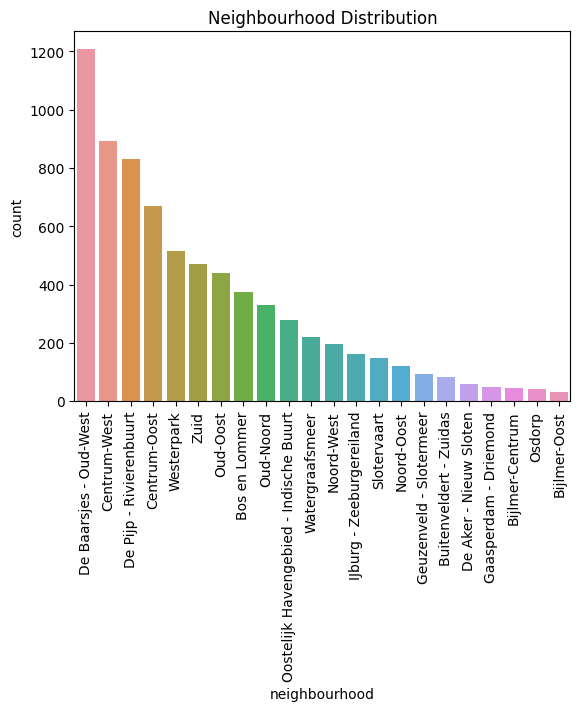

In [70]:
sns.countplot(x='neighbourhood', data=df, order=df['neighbourhood'].value_counts().index)
plt.title("Neighbourhood Distribution")
plt.xticks(rotation=90)
plt.show()

- we see that `highest number of listings` is in `De Baarsjes - Oud-West`
- we see that `least number of listings` is in `Bijlmer-Oost`

we plot `prices` vary across different `neighbourhoods` using box plots.

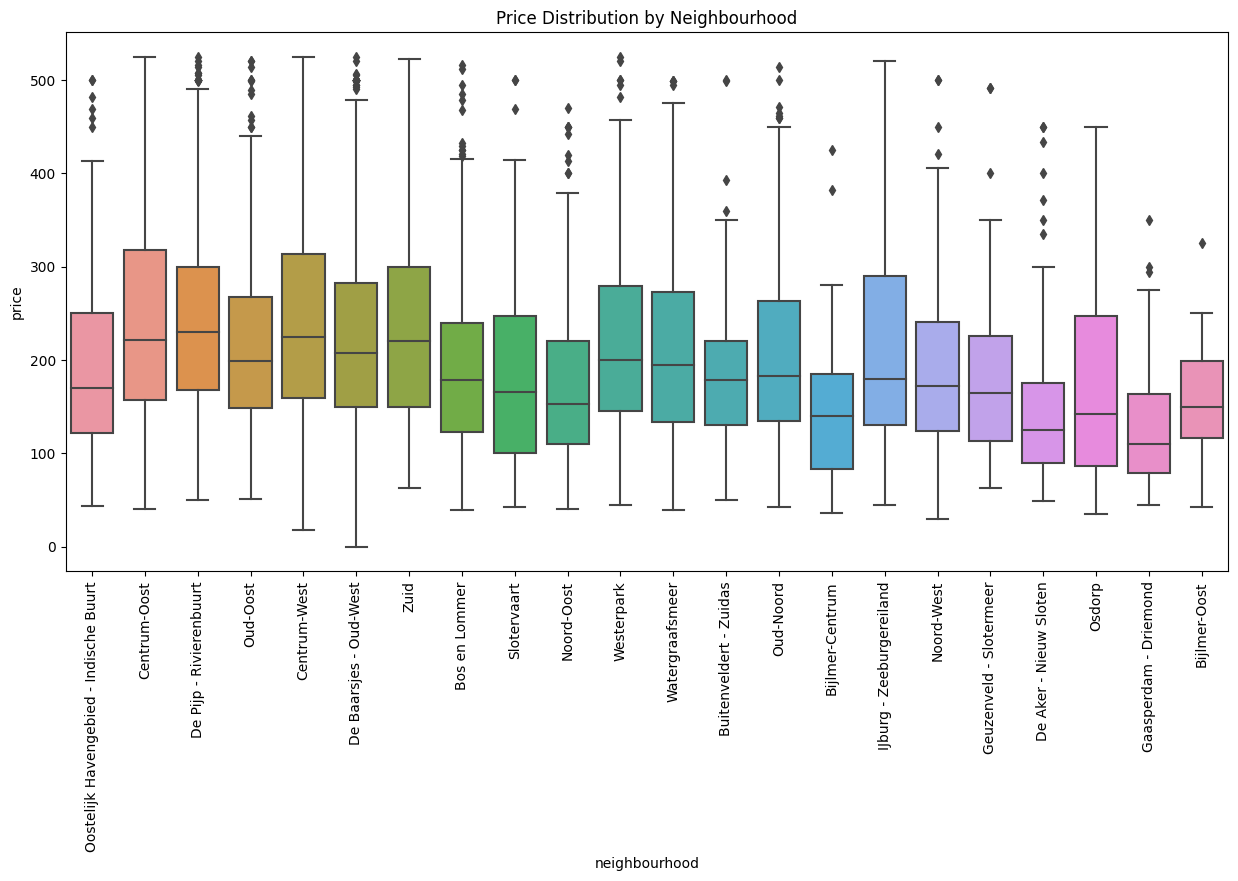

In [71]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='neighbourhood', y='price', data=df)
plt.title("Price Distribution by Neighbourhood")
plt.xticks(rotation=90)
plt.show()

we see that `average prices` are in range `150 to 200`

Using `histograms` we know Understand how `availability` varies across different `room types` or `neighbourhoods`.

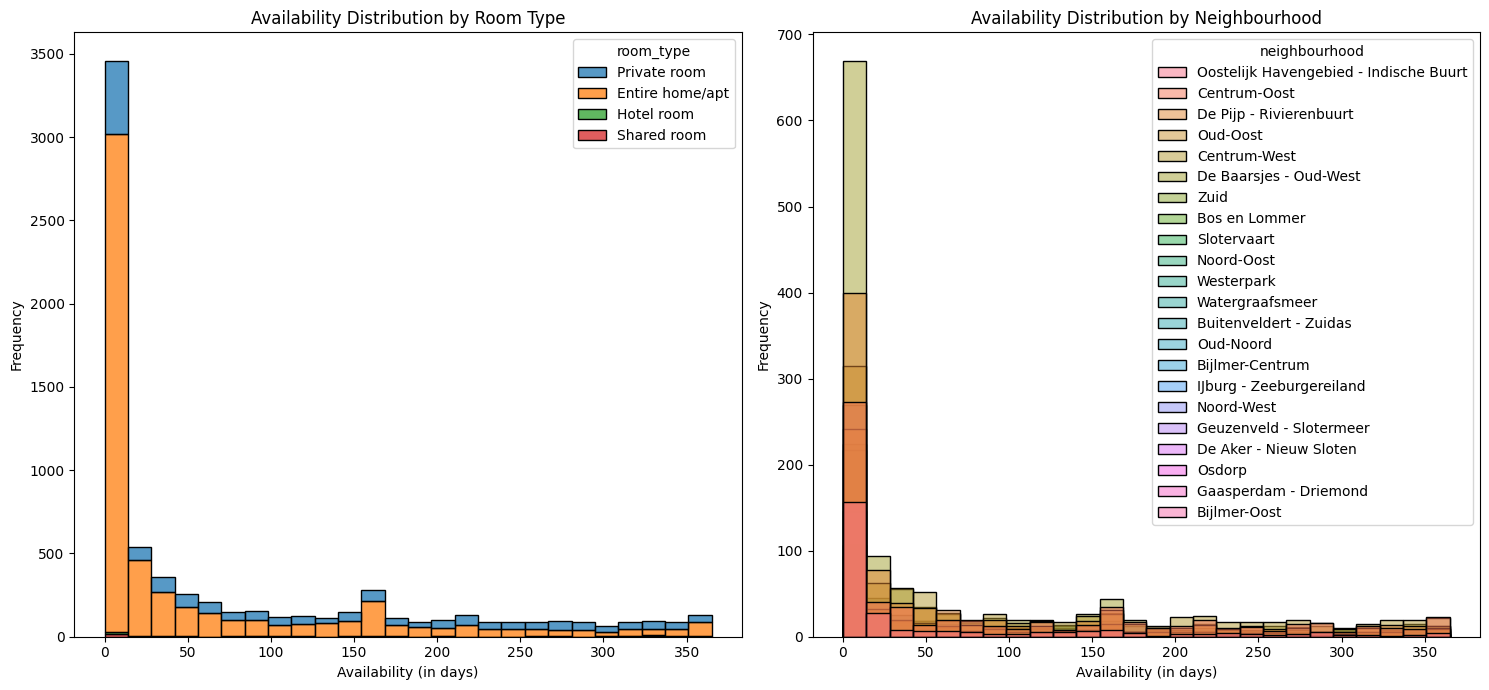

In [72]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='availability_365', hue='room_type', multiple='stack')
plt.xlabel('Availability (in days)')
plt.ylabel('Frequency')
plt.title('Availability Distribution by Room Type')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='availability_365', hue='neighbourhood')
plt.xlabel('Availability (in days)')
plt.ylabel('Frequency')
plt.title('Availability Distribution by Neighbourhood')

plt.tight_layout()
plt.show()


+ First subplot we see that distribution of the most `availability` at `beginning year` then decreasing after `50 dayr` and distribution is fouse on two types only (`private room and Entire room`) and we see that there are some problems with other types (`Hotel room and Shared room`)!

+ Second subplot we see that distribution of the most `availability` at `beginning year` then decreasing after `50 day` and distribution is fouse on (`De Baarsjes - Oud-West & Centrum-West & De Pijp - Rivierenbuurt & Centrum-Oost & Westerpark`)

Analyze trends over time by plotting the average `price`, `number of reviews`, or `availability` over different `months`.

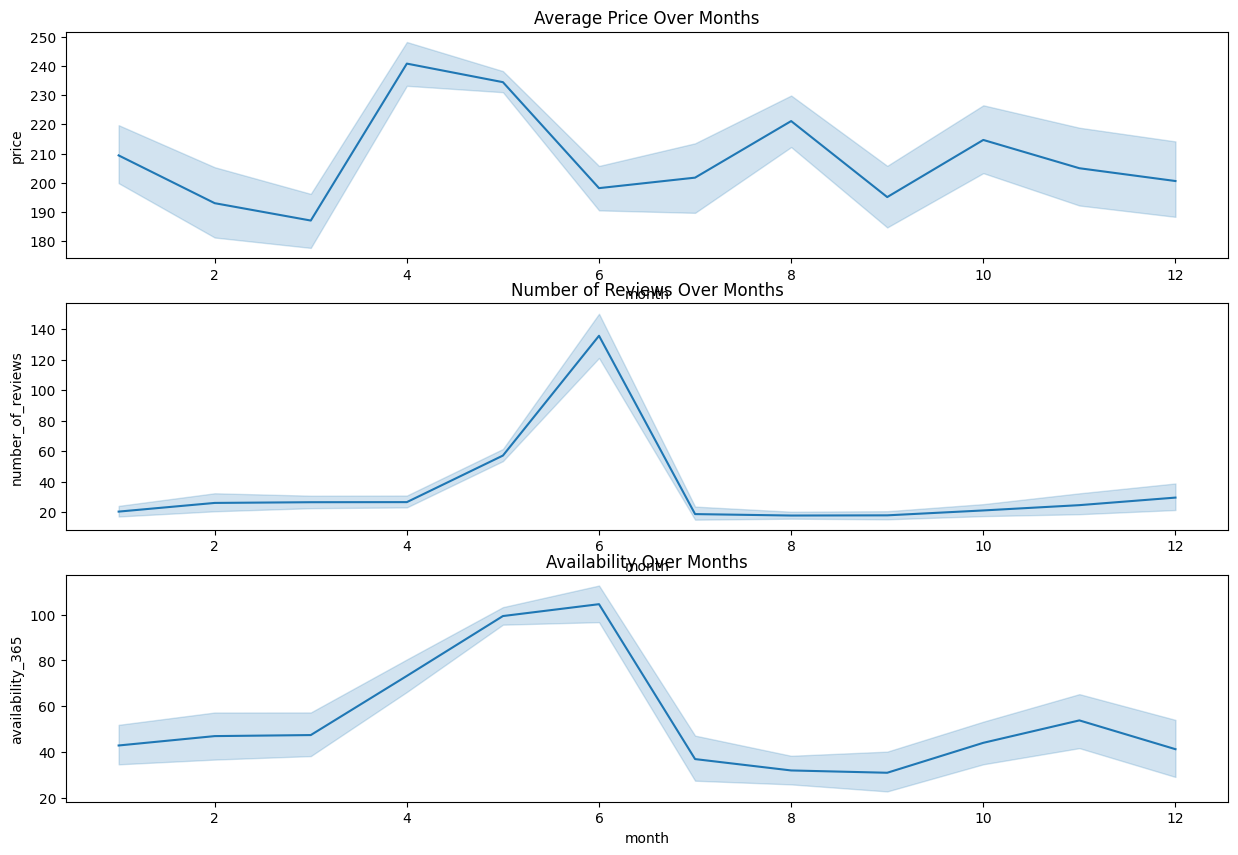

In [73]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

sns.lineplot(data=df, x='month', y='price', ax=ax[0])
ax[0].set_title('Average Price Over Months')

sns.lineplot(data=df, x='month', y='number_of_reviews', ax=ax[1])
ax[1].set_title('Number of Reviews Over Months')

sns.lineplot(data=df, x='month', y='availability_365', ax=ax[2])
ax[2].set_title('Availability Over Months')
plt.show()


+ First plot we see that `most prices` are in `month #4` and `less prices` are in `month #3`.
+ Second plot we see that `most number_of_reviews` are in `month #6` and `less number_of_reviews` are in `month #1 , #7 , #8 and #9`.
+ Third plot we see that `most availability_365` are in `month #6` and `less availability_365` are in `month #9`.

average `price` over different `years`

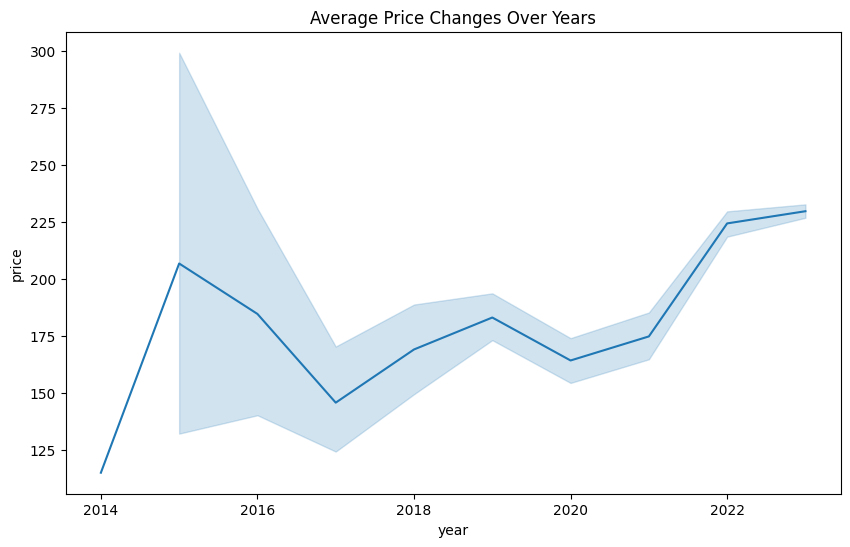

In [74]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='price')
plt.title('Average Price Changes Over Years')
plt.show()

we see that `most prices` are in `year #2023` and `less prices` are in `year #2014`.

number of `listings` were last reviewed per `month`

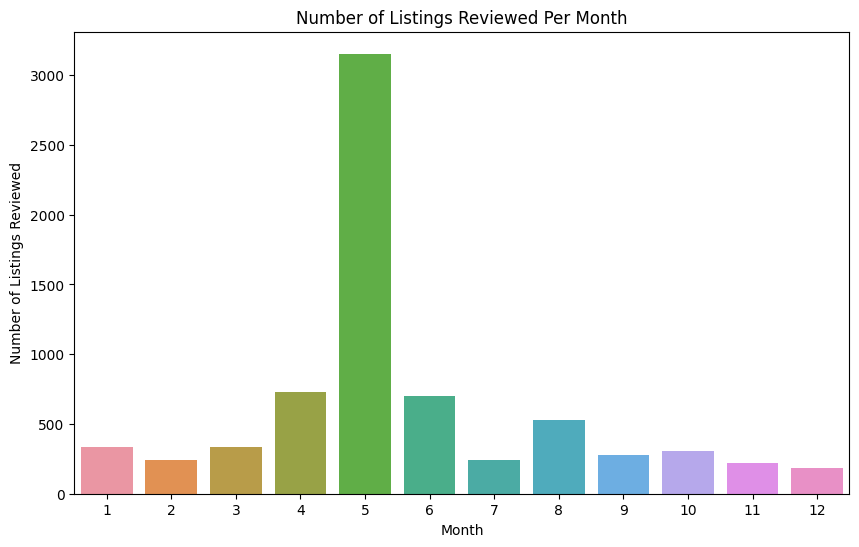

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['month'].value_counts().sort_index().index, y=df['month'].value_counts().sort_index().values)
plt.xlabel('Month')
plt.ylabel('Number of Listings Reviewed')
plt.title('Number of Listings Reviewed Per Month')
plt.show()

+ we see that `month #5` is the `most` month of the year have `number of listings reviewed`.
+ `month #12` is the `less` month of the year have `number of listings reviewed`.